In [20]:
#install dependencies
!pip install textblob
!pip install vaderSentiment
!pip install transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [21]:
# Introduction to Sentiment Analysis for Developmental Economics and other use cases
# This notebook demonstrates basic sentiment analysis techniques using Python

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
from transformers import pipeline

In [22]:
# Download necessary NLTK data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/calebagoha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [23]:
# Sample political manifesto statements
manifesto_statements = [
    "We will invest heavily in renewable energy to combat climate change.",
    "Our policies will reduce taxes for all citizens.",
    "The current administration has failed to address rising unemployment.",
    "We promise to improve healthcare access for rural communities.",
    "Our party stands for freedom and prosperity for all."
] 

# if it is a full manifesto you can either split it into sentenes by looking for each full stop or you can qualitativelu split it into sections and analyzes each section
# sentences = [sentence.strip() for sentence in text.split('.') if sentence.strip()]
# import 'nameof the text.txt'

In [24]:
# Create a DataFrame
df = pd.DataFrame(manifesto_statements, columns=['statement'])

In [25]:
df

,statement
0,We will invest heavily in renewable energy to ...
1,Our policies will reduce taxes for all citizens.
2,The current administration has failed to addre...
3,We promise to improve healthcare access for ru...
4,Our party stands for freedom and prosperity fo...


In [26]:
# Function to get polarity scores using TextBlob
def get_textblob_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity #can also do subjectivity (0 to 1)

    # you can also do per sentence:
    #sentence_sentiments = [sentence.sentiment.polarity for sentence in blob.sentences]


# Function to get sentiment scores using VADER
def get_vader_sentiment(text):
    sid = SentimentIntensityAnalyzer()
    return sid.polarity_scores(text)['compound']

Textblob is better suited for longer text and political manifestos whereas VADER is more suited for shorter text such as soical media comments. They both do not require much pre-processing as context matters. The scores range from -1 to 1 with schores around 0 generally considered neutral.

In [27]:
# Apply sentiment analysis
df['textblob_polarity'] = df['statement'].apply(get_textblob_polarity)
df['vader_sentiment'] = df['statement'].apply(get_vader_sentiment)

# Print results
print("Basic Sentiment Analysis Results:")
print(display(df))

Basic Sentiment Analysis Results:


,statement,textblob_polarity,vader_sentiment
0,We will invest heavily in renewable energy to ...,-0.20,-0.0772
1,Our policies will reduce taxes for all citizens.,0.00,0.0000
2,The current administration has failed to addre...,-0.25,-0.7351
3,We promise to improve healthcare access for ru...,0.00,0.6369
4,Our party stands for freedom and prosperity fo...,0.00,0.7845


None


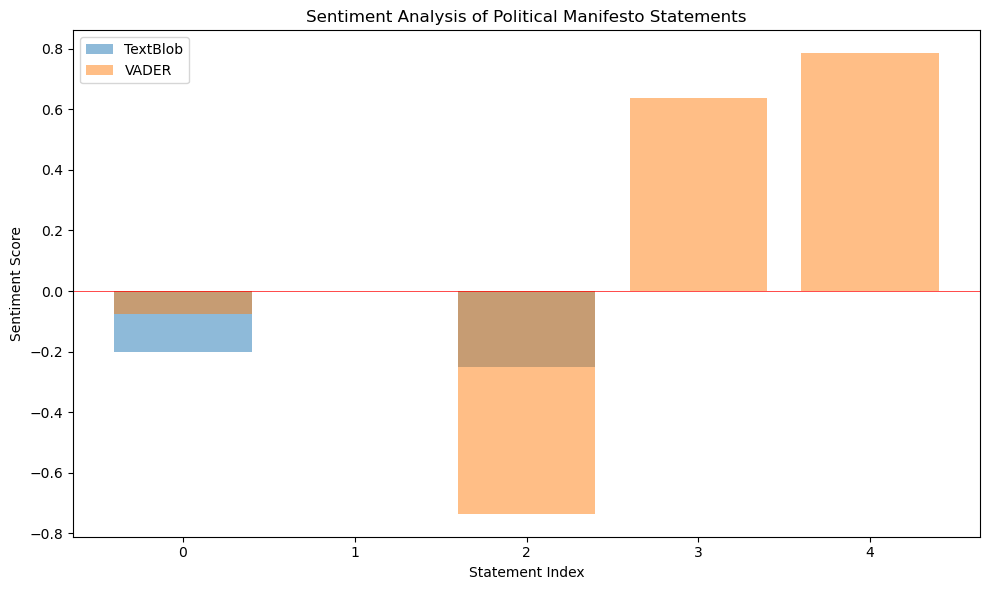

In [28]:
# Visualize results
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['textblob_polarity'], alpha=0.5, label='TextBlob')
plt.bar(df.index, df['vader_sentiment'], alpha=0.5, label='VADER')
plt.axhline(y=0, color='r', linestyle='-', linewidth=0.5)
plt.xlabel('Statement Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of Political Manifesto Statements')
plt.legend()
plt.tight_layout()
plt.show()


VADER allows for more nuanced sentiment analysis by giving a positive, negative, neutral and compound snetiment score for each text it analyzes.

In [29]:
print("\nDetailed VADER Sentiment Scores:")
sid = SentimentIntensityAnalyzer()
for i, statement in enumerate(manifesto_statements):
    scores = sid.polarity_scores(statement)
    print(f"\nStatement {i + 1}:")
    print(f"'{statement}'")
    print(f"Positive: {scores['pos']:.2f}")
    print(f"Neutral: {scores['neu']:.2f}")
    print(f"Negative: {scores['neg']:.2f}")
    print(f"Compound: {scores['compound']:.2f}")


Detailed VADER Sentiment Scores:

Statement 1:
'We will invest heavily in renewable energy to combat climate change.'
Positive: 0.16
Neutral: 0.67
Negative: 0.18
Compound: -0.08

Statement 2:
'Our policies will reduce taxes for all citizens.'
Positive: 0.00
Neutral: 1.00
Negative: 0.00
Compound: 0.00

Statement 3:
'The current administration has failed to address rising unemployment.'
Positive: 0.00
Neutral: 0.53
Negative: 0.47
Compound: -0.74

Statement 4:
'We promise to improve healthcare access for rural communities.'
Positive: 0.43
Neutral: 0.57
Negative: 0.00
Compound: 0.64

Statement 5:
'Our party stands for freedom and prosperity for all.'
Positive: 0.50
Neutral: 0.50
Negative: 0.00
Compound: 0.78


In [30]:
# Emotion Detection using Hugging Face Transformers
print("\nEmotion Detection using Hugging Face Transformers:")

# Initialize the emotion detection pipeline
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)


Emotion Detection using Hugging Face Transformers:


/Users/calebagoha/anaconda3/lib/python3.11/site-packages/transformers/modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_file,

In [31]:
# Perform emotion detection
for i, statement in enumerate(manifesto_statements):
    emotions = emotion_classifier(statement)[0]
    print(f"\nStatement {i + 1}:")
    print(f"'{statement}'")
    for emotion in emotions:
        print(f"{emotion['label']}: {emotion['score']:.4f}")


Statement 1:
'We will invest heavily in renewable energy to combat climate change.'
neutral: 0.8500
sadness: 0.0386
anger: 0.0353
disgust: 0.0274
fear: 0.0273
joy: 0.0159
surprise: 0.0055

Statement 2:
'Our policies will reduce taxes for all citizens.'
neutral: 0.8789
joy: 0.0568
anger: 0.0344
disgust: 0.0137
sadness: 0.0086
surprise: 0.0057
fear: 0.0019

Statement 3:
'The current administration has failed to address rising unemployment.'
disgust: 0.3380
sadness: 0.3086
neutral: 0.2502
anger: 0.0765
fear: 0.0199
surprise: 0.0046
joy: 0.0021

Statement 4:
'We promise to improve healthcare access for rural communities.'
neutral: 0.7315
joy: 0.1843
disgust: 0.0325
anger: 0.0223
sadness: 0.0165
fear: 0.0073
surprise: 0.0056

Statement 5:
'Our party stands for freedom and prosperity for all.'
neutral: 0.5500
joy: 0.2514
anger: 0.1165
disgust: 0.0537
sadness: 0.0158
fear: 0.0082
surprise: 0.0044


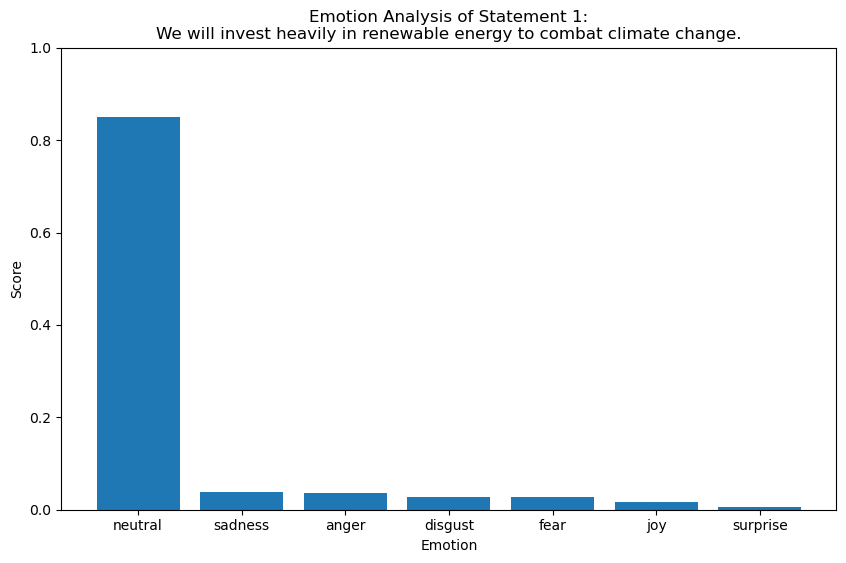

In [32]:
# Visualize Hugging Face emotion results for the first statement
plt.figure(figsize=(10, 6))
emotions = emotion_classifier(manifesto_statements[0])[0]
labels = [e['label'] for e in emotions]
scores = [e['score'] for e in emotions]
plt.bar(labels, scores)
plt.title(f"Emotion Analysis of Statement 1:\n{manifesto_statements[0]}")
plt.xlabel('Emotion')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

In [ ]:
# You can also do it with video using MEXCA or any other similar package